## Numerical Differentiation

Li Liu

7/5/2019

### Pbm 1
Write a function that defines f(x) = (sin(x) + 1)sin(cos(x)) and takes its symbolic derivative with respect to x using SymPy. Lambdify the resulting function so that it can accept NumPy arrays and return the resulting function handle.

In [1]:
from matplotlib import pyplot as plt
from sympy import *
from math import pi 
import numpy as np

#Define the symbolic function
x = Symbol('x')
y = (sin(x)+1)**(sin(cos(x)))

sym = lambda x: y.diff(x)
print("Symbolic derivative of the function:")
sym(x)

Symbolic derivative of the function:


(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [3]:
diff(y,x)

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [4]:
#Create the NumPy array and lambdify the functions
xvec=np.linspace(-pi,pi,1000)
f = lambdify(x, y, 'numpy')
fprime=lambdify(x,sym(x),'numpy')

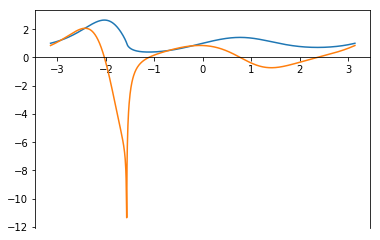

In [5]:
#Plot f and f'
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(xvec, f(xvec))
plt.plot(xvec, fprime(xvec))
plt.show()

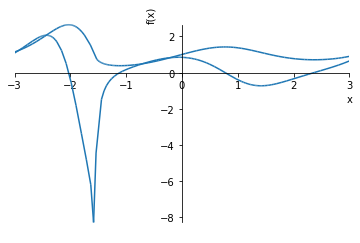

In [7]:
#Symplot for plotting
from sympy.plotting import plot as symplot
symplot(y,sym(x),(x,-3,3))

### Pbm 2
Write a function for each of the finite difference quotients listed in Table 8.1. Each function should accept a function handle f, an array of points x, and a float h; each should return an array of the difference quotients evaluated at each point in x

In [8]:
def Forward1(func,*args,h=0.01):
    return [(func(x+h)-func(x))/h for x in args][0]

In [9]:
def Forward2(func,*args,h=0.01):
    return [(4*func(x+h)-func(x+2*h)-3*func(x))/(2*h) for x in args][0]

In [10]:
def Backward1(func,*args,h=0.01):
    return [(func(x)-func(x-h))/h for x in args][0]

In [11]:
def Backward2(func,*args,h=0.01):
    return [(-4*func(x-h)+func(x-2*h)+3*func(x))/(2*h) for x in args][0]

In [12]:
def Centered2(func,*args,h=0.01):
    return [(func(x+h)-func(x-h))/(2*h) for x in args][0]

In [14]:
def Centered4(func,*args,h=0.01):
    return [(func(x-2*h)-8*func(x-h)+8*func(x+h)-
             func(x+2*h))/(12*h) for x in args][0]

Approximate the derivative of f(x) = (sin(x) + 1)sin(cos(x)) at each point of a domain over [−π, π].

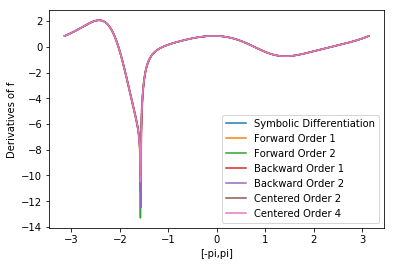

In [15]:
plt.plot(xvec, fprime(xvec),label='Symbolic Differentiation')
plt.plot(xvec, Forward1(f,xvec),label='Forward Order 1')
plt.plot(xvec, Forward2(f,xvec),label='Forward Order 2')
plt.plot(xvec, Backward1(f,xvec),label='Backward Order 1')
plt.plot(xvec, Backward2(f,xvec),label='Backward Order 2')
plt.plot(xvec, Centered2(f,xvec),label='Centered Order 2')
plt.plot(xvec, Centered4(f,xvec),label='Centered Order 4')
plt.legend(loc='lower right')
plt.xlabel("[-pi,pi]")
plt.ylabel("Derivatives of f")
plt.show()

The seven plots are almost the same!

### Pbm 3
Write a function that accepts a point x0 at which to compute the derivative of
f(x) = (sin(x) + 1)sin(cos(x)).

In [16]:
#Function for computing absolute error against h of exact and approximate f'(x)
def convergence(x):
    x0=fprime(x)
    hvec=np.logspace(-8,0,9)
    plt.plot(hvec,abs([Forward1(f,x,h=i) for i in hvec]-x0),label='Order 1 Forward')
    plt.plot(hvec,abs([Forward2(f,x,h=i) for i in hvec]-x0),label='Order 2 Forward')
    plt.plot(hvec,abs([Backward1(f,x,h=i) for i in hvec]-x0),label='Order 1 Backward')
    plt.plot(hvec,abs([Backward2(f,x,h=i) for i in hvec]-x0),label='Order 2 Backward')
    plt.plot(hvec,abs([Centered2(f,x,h=i) for i in hvec]-x0),label='Order 2 Centered')
    plt.plot(hvec,abs([Centered4(f,x,h=i) for i in hvec]-x0),label='Order 4 Centered')
    plt.legend(loc='upper left')
    plt.xlabel("h")
    plt.ylabel("Absolute Error")
    plt.loglog()
    plt.show()

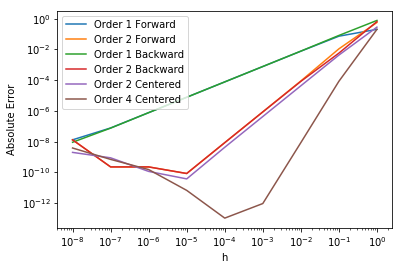

In [20]:
#Example plot at x=1
hvec=np.logspace(-8,0,9)
convergence(1)

### Pbm 4
Load the data, convert α and β to radians, then compute the coordinates x(t) and y(t) at each given t using 8.4. Approximate x0(t) and y0(t) using a forward difference quotient for t = 7, a backward difference quotient for t = 14, and a centered difference quotient for t = 8, 9, . . . , 13 (see Figure 8.1). Return the values of the speed at each t.

In [62]:
#Transform the matrix data into DataFrame for better represenation
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df=np.load("plane.npy")
radar=pd.DataFrame(df,columns=['t','alpha','beta'])

#Degree to radian
radar['alpha']=np.deg2rad(radar['alpha'])
radar['beta']=np.deg2rad(radar['beta'])
a=500

#Calculate the plane location on the Cartesian coordinates
radar['x(t)']=(a*np.tan(radar['beta']))/(np.tan(radar['beta'])-np.tan(radar['alpha']))
radar['y(t)']=(a*np.tan(radar['beta'])*np.tan(radar['alpha']))\
                /(np.tan(radar['beta'])-np.tan(radar['alpha']))

#Approximate x'(t) and y'(t)
radar['x_prime(t)']=0
radar['x_prime(t)'][0]=radar['x(t)'][1]-radar['x(t)'][0]
radar['x_prime(t)'][7]=radar['x(t)'][7]-radar['x(t)'][6]
radar['y_prime(t)']=0
radar['y_prime(t)'][0]=radar['y(t)'][1]-radar['y(t)'][0]
radar['y_prime(t)'][7]=radar['y(t)'][7]-radar['y(t)'][6]
for i in range(1,7):
    radar['x_prime(t)'][i]=0.5*(radar['x(t)'][i+1]-radar['x(t)'][i-1])
    radar['y_prime(t)'][i]=0.5*(radar['y(t)'][i+1]-radar['y(t)'][i-1])

radar['speed']=np.sqrt(radar['x_prime(t)']**2+radar['y_prime(t)']**2).round(2)
radar

,t,alpha,beta,x(t),y(t),x_prime(t),y_prime(t),speed
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44,12,45.61
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45,12,46.57
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47,12,48.51
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48,13,49.73
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46,12,47.54
5,12.0,0.919614,1.095020,1543.798955,2025.792234,49,13,50.70
6,13.0,0.906524,1.077217,1598.041382,2040.990583,51,14,52.89
7,14.0,0.895005,1.061509,1647.596093,2055.065571,49,14,50.96


In [63]:
#Return the speed at each t
radar[['t','speed']]

,t,speed
0,7.0,45.61
1,8.0,46.57
2,9.0,48.51
3,10.0,49.73
4,11.0,47.54
5,12.0,50.70
6,13.0,52.89
7,14.0,50.96


### Pbm 5
Write a function that accepts a function f : Rn → Rm, a point x0 ∈ Rn, and a
float h. Approximate the Jacobian matrix of f at x using the second order centered difference quotient in (8.5).

In [85]:
def Jacobian(func,pt,h):
    n=len(func)
    dim=len(pt)
    I=np.identity(dim)
    J = zeros(n,dim)
    for i,fu in enumerate(func):
        for j,s in enumerate(pt):
            f= lambdify((x,y), fu, 'numpy')
            right=pt+h*I[:,j]
            left=pt-h*I [:,j]
            J[i,j]=(f(right[0],right[1])-f(left[0],left[1]))/(2*h)
    return J

In [87]:
#Test the Jacobian calculation function
x = Symbol('x')
y = Symbol('y')
func1=x**2
func2=x**3-y
func=[func1,func2]
pt=[1,1]
h=0.01
Jacobian(func,pt,h)

Matrix([
[             2.0,  0.0],
[3.00010000000001, -1.0]])

In [94]:
jacob = Matrix(([x**2, x**3-y])).jacobian((x,y))
lambdify((x,y),jacob)(1,1)

array([[ 2,  0],
       [ 3, -1]])

### Pbm 6

Chebyshev polynomials

In [33]:
from autograd import numpy as anp
from autograd import grad, elementwise_grad

In [70]:
def Chebyshev(x, n):
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2*x*Chebyshev(x, n-1)-Chebyshev(x, n-2)

In [72]:
g = elementwise_grad(Chebyshev)

C:\Anaconda\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


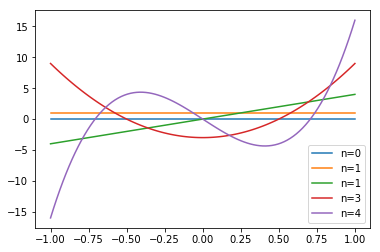

In [84]:
xvec=anp.linspace(-1, 1, 100)

plt.plot(xvec, g(xvec,0), label='n=0')
plt.plot(xvec, g(xvec,1), label='n=1')
plt.plot(xvec, g(xvec,2), label='n=1')
plt.plot(xvec, g(xvec,3), label='n=3')
plt.plot(xvec, g(xvec,4), label='n=4')
plt.legend()
plt.show()

### Pbm 7
Plot the computation times versus the absolute errors on a log-log plot with different colors for SymPy, the difference quotient, and Autograd. 

In [22]:
#Play around with Autograd
yy=lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
fauto=grad(yy)
print("Results from symbolic differentiation:",fprime(0.0))
print("Results from Autograd differentiation",fauto(0.)) #Take floats

Results from symbolic differentiation: 0.8414709848078965
Results from Autograd differentiation 0.8414709848078965


In [23]:
import time

def experiment(N):
    
    global CT1,CT2,CT3,abse1,abse2
    CT1,CT2,CT3=[],[],[]
    abse1,abse2=[],[]
    for i in range(N):
        xr=np.random.uniform(-pi,pi)
        t0=time.clock()
        sym=lambda x: y.diff(x)
        fprime=lambdify(x,sym(x),'numpy')  
        x0=fprime(xr)
        t1=time.clock()
        CT1.append(t1-t0)
        
        t2=time.clock()
        xapp=Centered4(yy,xr,h=0.01)
        t3=time.clock()
        CT2.append(t3-t2)  
        abse1.append(abs(xapp-x0))
        
        t4=time.clock()
        xauto=fauto(xr)
        t5=time.clock()
        CT3.append(t5-t4)  
        abse2.append(abs(xauto-x0))     
   
    plt.scatter(np.array(CT1),np.array([1e-18] * N), alpha=0.8,label="SymPy")
    plt.scatter(np.array(CT2),np.array(abse1),alpha=0.8,label="Difference Quotients")
    plt.scatter(np.array(CT3),np.array(abse2), alpha=0.8,label="Autograd")
    plt.legend(loc='upper right')
    plt.xlabel("Computation Time (seconds)")
    plt.ylabel("Absolute Error")
    plt.xlim(10**-5,10**-2)
    plt.ylim(10**-19,10**-7)
    plt.loglog()
    plt.show()


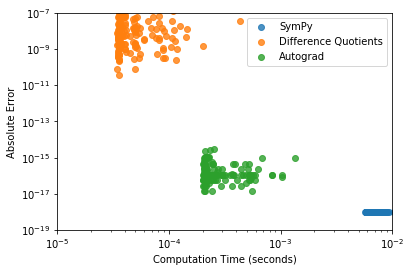

In [24]:
experiment(200)